In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
held_out_B_data = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_B_sites_predictions.json")
held_out_B_data_CGCNN = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_B_sites_predictions.json")


In [5]:
held_out_B_data

,formula,framework,composition,n_atoms_unrelaxed,n_atoms_opt,unrelaxed_cryst_id,unrelaxed_struct,opt_cryst_id,opt_struct,es_job_id,dft_energy,dft_energy_per_atom,dft_e_hull,Op_band_center,M3Gnet_relaxed_struct,M3Gnet_relaxed_energy,M3Gnet_relaxed_energy_per_atom,idx,predicted_dft_e_hull
0,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998128,"{'@module': 'pymatgen.core.structure', '@class...",423959398,"{'@module': 'pymatgen.core.structure', '@class...",123103556,-265.489796,-6.637245,0.074200,-1.389153,"{'@module': 'pymatgen.core.structure', '@class...",-266.711243,-6.667781,0,0.077370
1,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998125,"{'@module': 'pymatgen.core.structure', '@class...",421466237,"{'@module': 'pymatgen.core.structure', '@class...",122979400,-265.627054,-6.640676,0.070768,-1.420044,"{'@module': 'pymatgen.core.structure', '@class...",-266.456848,-6.661421,1,0.076950
2,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998126,"{'@module': 'pymatgen.core.structure', '@class...",421466235,"{'@module': 'pymatgen.core.structure', '@class...",122979657,-265.542706,-6.638568,0.072877,-1.424778,"{'@module': 'pymatgen.core.structure', '@class...",-266.213867,-6.655347,2,0.076547
3,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998127,"{'@module': 'pymatgen.core.structure', '@class...",421466263,"{'@module': 'pymatgen.core.structure', '@class...",122979417,-265.631202,-6.640780,0.070665,-1.404994,"{'@module': 'pymatgen.core.structure', '@class...",-264.671021,-6.616776,3,0.077123
4,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998129,"{'@module': 'pymatgen.core.structure', '@class...",421466289,"{'@module': 'pymatgen.core.structure', '@class...",122979438,-265.628562,-6.640714,0.070731,-1.381979,"{'@module': 'pymatgen.core.structure', '@class...",-266.308624,-6.657716,4,0.077057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062436,"{'@module': 'pymatgen.core.structure', '@class...",421446419,"{'@module': 'pymatgen.core.structure', '@class...",122979607,-291.947011,-7.298675,0.083433,-1.855526,"{'@module': 'pymatgen.core.structure', '@class...",-289.953644,-7.248841,595,0.100901
596,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062439,"{'@module': 'pymatgen.core.structure', '@class...",421459053,"{'@module': 'pymatgen.core.structure', '@class...",122979241,-293.275698,-7.331892,0.050215,-1.358484,"{'@module': 'pymatgen.core.structure', '@class...",-290.115479,-7.252887,596,0.078920
597,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062435,"{'@module': 'pymatgen.core.structure', '@class...",421464614,"{'@module': 'pymatgen.core.structure', '@class...",122979281,-291.822920,-7.295573,0.086535,-1.938487,"{'@module': 'pymatgen.core.structure', '@class...",-291.638702,-7.290968,597,0.100350
598,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062438,"{'@module': 'pymatgen.core.structure', '@class...",421446230,"{'@module': 'pymatgen.core.structure', '@class...",122979130,-292.317225,-7.307931,0.074177,-1.890348,"{'@module': 'pymatgen.core.structure', '@class...",-292.125397,-7.303135,598,0.089636


In [6]:
held_out_B_data["e3nn_val"] = held_out_B_data.predicted_dft_e_hull
held_out_B_data["CGCNN_val"] = held_out_B_data_CGCNN.predicted_dft_e_hull

In [7]:
import json 
   
# Opening JSON file 
f = open('ABBO3_degeneracy.json',) 
   
# returns JSON object as  
# a dictionary 
degen = json.load(f) 
   
f.close() 

In [8]:
degen = np.asarray(list(degen['A8_B(4:4)_O24'].values()))

In [9]:
degen

array([ 6,  8, 24, 24,  6,  2])

In [10]:
formula_to_entropy_dft = {}
formula_to_entropy_CGCNN = {}
formula_to_entropy_e3nn = {}
formula_to_entropy_m3gnet = {}


formula_to_Prs_dft = {}
formula_to_Prs_CGCNN = {}
formula_to_Prs_e3nn = {}
formula_to_Prs_m3gnet = {}

formulas = set(held_out_B_data.formula)

In [11]:
T = 1300
kb = 0.0000861733326


def get_Prs(data,formula,energies):
    data_form = data[data.formula==formula].copy()
    data_form_sorted = data_form.sort_values(by=["unrelaxed_cryst_id"],axis=0)
    energies = np.asarray(data_form_sorted[energies])*40.0
    energies -= energies.min()
    probs = np.exp(-energies/(kb*T))*degen
    probs = probs / probs.sum()
    
    return probs[-1]
    
    
    
def get_entropy(data,formula,energies):
    
    data_form = data[data.formula==formula].copy()
    data_form_sorted = data_form.sort_values(by=["unrelaxed_cryst_id"],axis=0)
    energies = np.asarray(data_form_sorted[energies])*40.0
    energies -= energies.min()
    Bolzmann_terms = np.exp(-energies/(kb*T))
    weighted_probs = Bolzmann_terms*degen / np.sum(Bolzmann_terms*degen)
    
    entropy = 0
    entropy_norm = 0
    
    Z = np.sum(Bolzmann_terms*degen)
    
    uniform_Bolzmann_terms = np.ones(Bolzmann_terms.shape)
    uniform_Z = np.sum(degen*uniform_Bolzmann_terms)
    uniform_weighted_probs = uniform_Bolzmann_terms*degen / uniform_Z

    for i in range(Bolzmann_terms.shape[0]):
        entropy += weighted_probs[i]*np.log(Bolzmann_terms[i]/Z)
        
        entropy_norm += uniform_weighted_probs[i]*np.log(uniform_Bolzmann_terms[i]/uniform_Z)

    return entropy/entropy_norm

In [12]:
for formula in formulas:
    formula_to_entropy_dft[formula] = get_entropy(held_out_B_data.copy(),formula,"dft_e_hull")
    formula_to_entropy_CGCNN[formula] = get_entropy(held_out_B_data.copy(),formula,"CGCNN_val")
    formula_to_entropy_e3nn[formula] = get_entropy(held_out_B_data.copy(),formula,"e3nn_val")
    formula_to_entropy_m3gnet[formula] = get_entropy(held_out_B_data.copy(),formula,"M3Gnet_relaxed_energy_per_atom")
    formula_to_Prs_dft[formula]  = get_Prs(held_out_B_data.copy(),formula,"dft_e_hull")
    formula_to_Prs_CGCNN[formula] = get_Prs(held_out_B_data.copy(),formula,"CGCNN_val")
    formula_to_Prs_e3nn[formula] = get_Prs(held_out_B_data.copy(),formula,"e3nn_val")
    formula_to_Prs_m3gnet[formula] = get_Prs(held_out_B_data.copy(),formula,"M3Gnet_relaxed_energy_per_atom")


In [13]:
entropy_dft = list(formula_to_entropy_dft.values())
entropy_CGCNN = list(formula_to_entropy_CGCNN.values())
entropy_e3nn = list(formula_to_entropy_e3nn.values())
entropy_m3gnet = list(formula_to_entropy_m3gnet.values())

Prs_dft = list(formula_to_Prs_dft.values())
Prs_CGCNN = list(formula_to_Prs_CGCNN.values())
Prs_e3nn = list(formula_to_Prs_e3nn.values())
Prs_m3gnet = list(formula_to_Prs_m3gnet.values())


In [14]:
import matplotlib.pyplot as plt

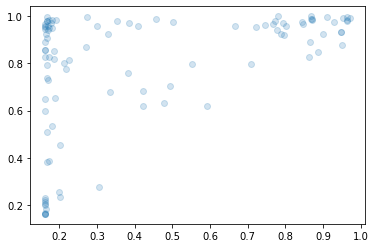

In [15]:
plt.scatter(entropy_dft,entropy_CGCNN,alpha=0.2)

In [16]:
np.corrcoef(entropy_dft,entropy_CGCNN)

array([[1.       , 0.4586404],
       [0.4586404, 1.       ]])

In [17]:
min(entropy_dft)

0.16315121970519145

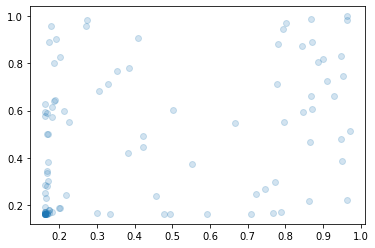

In [18]:
plt.scatter(entropy_dft,entropy_e3nn,alpha=0.2)

In [19]:
np.corrcoef(entropy_dft,entropy_e3nn)

array([[1.       , 0.3757819],
       [0.3757819, 1.       ]])

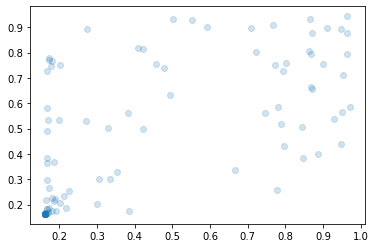

In [20]:
plt.scatter(entropy_dft,entropy_m3gnet,alpha=0.2)

In [21]:
np.corrcoef(entropy_dft,entropy_m3gnet)

array([[1.      , 0.635142],
       [0.635142, 1.      ]])

In [22]:
from sklearn import metrics

In [23]:
metrics.r2_score(entropy_dft,entropy_CGCNN)

-1.2432846419331378

In [24]:
metrics.r2_score(entropy_dft,entropy_e3nn)

-0.17098043064880342

In [25]:
metrics.r2_score(entropy_dft,entropy_m3gnet)

0.3202707427123447

In [26]:
print(len(entropy_dft))

100


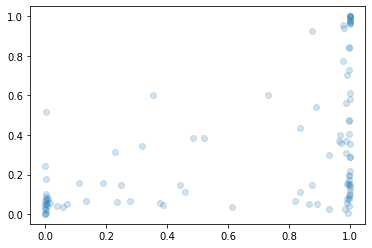

In [27]:
plt.scatter(Prs_dft,Prs_CGCNN,alpha=0.2)

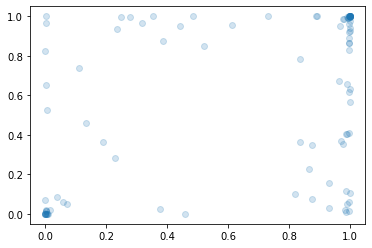

In [28]:
plt.scatter(Prs_dft,Prs_e3nn,alpha=0.2)

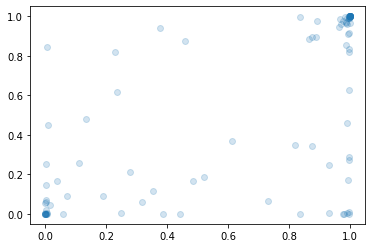

In [29]:
plt.scatter(Prs_dft,Prs_m3gnet,alpha=0.2)

In [30]:
metrics.r2_score(Prs_dft,Prs_CGCNN)

-0.43925121019629754

In [31]:
metrics.r2_score(Prs_dft,Prs_e3nn)

-0.11742839832938734

In [32]:
metrics.r2_score(Prs_dft,Prs_m3gnet)

0.2663014785523642

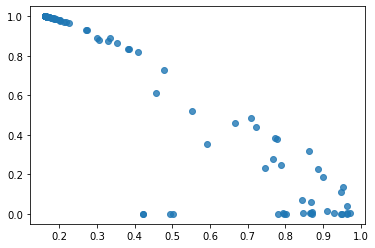

In [33]:
plt.scatter(entropy_dft,Prs_dft,alpha=0.8)

In [34]:
len(entropy_dft)

100

In [35]:
import json

with open('entropy_CGCNN_held_out_best.json', 'w') as fp:
    json.dump(formula_to_entropy_CGCNN, fp)
    
with open('entropy_e3nn_held_out_best.json', 'w') as fp:
    json.dump(formula_to_entropy_e3nn, fp)

    
with open('Prs_CGCNN_held_out_best.json', 'w') as fp:
    json.dump(formula_to_Prs_CGCNN, fp)
    
with open('Prs_e3nn_held_out_best.json', 'w') as fp:
    json.dump(formula_to_Prs_e3nn, fp)
    
